In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
%matplotlib inline

Fit User guide
=====================




data format
-------------------------

The SED data can be stored in ASCII file in a  quite flexible way, but some requirements are needed:

 - you must provide at least two columns for frequencies and fluxes
 - frequencies are in *Hz*
 - fluxes are in  *cgs*, .....

The header of the file can contain some meta-data that are sourced when the data are loaded.
The meta-data available are :

 - z : redhsift
 - resframe: restframe of the data `src` or `obs` 
 - data_scale: scale of the data `lin-lin` or `log-log`
 - dataType: structure of the comumns with the SED data




In [2]:
# metadata
# md z  0.0308
# md restframe  obs
# md data_scale  lin-lin
# md col_types x,y,dy,data_set
# md obj_name     J1104+3812,Mrk421
#

A typical structure of SED data file, including meta-data declaration  is the following:


```
# metadata
# md z  0.0308
# md restframe  obs
# md data_scale  lin-lin
# md col_types x,y,dy,data_set
# md obj_name     J1104+3812,Mrk421
#
# Frequency [Hz]  EnergyFlux [erg/cm2/s]
#  Xval	    	  Yval	     YvalError    data_set-flag
2.299540e+09 1.340900e-14 3.910000e-16    campaing-2009
2.639697e+09 1.793088e-14 3.231099e-26    campaing-2009
4.799040e+09 2.313600e-14 2.400000e-16    campaing-2009
4.805039e+09 1.773414e-14 1.773414e-15    campaing-2009
4.843552e+09 2.776140e-14 2.615339e-26    campaing-2009
7.698460e+09 3.696000e-14 4.620000e-16    campaing-2009
8.267346e+09 2.836267e-14 2.836267e-15    campaing-2009
8.331867e+09 3.989630e-14 3.627671e-26    campaing-2009
8.388659e+09 3.163450e-14 1.931495e-15    campaing-2009
8.399994e+09 4.000500e-14 5.041094e-15    campaing-2009
1.044892e+10 4.626737e-14 3.297726e-26    campaing-2009
1.109778e+10 4.617600e-14 6.660000e-16    campaing-2009
1.456571e+10 5.628417e-14 4.453463e-26    campaing-2009
```


Loading SEDs
-------------

In [3]:
from jetset.test_data_helper import  test_SEDs
test_SEDs

['/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/jetset-1.2.0-py3.6-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.dat',
 '/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/jetset-1.2.0-py3.6-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.dat',
 '/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/jetset-1.2.0-py3.6-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501.dat']

to load the SED of  Mrk 421, the first one in the list:

In [4]:
mySED=test_SEDs[1]
from jetset.data_loader import ObsData
sed_data=ObsData(data_file=mySED)


*** getting meta-data from file header
col_types None
set md z  to 0.0308
set md restframe  to obs
set md data_scale  to lin-lin
set md col_types  to x,y,dy,data_set
set md obj_name  to J1104+3812,Mrk421
ciccio x,y,dy,data_set
col_types x,y,dy,data_set

col_types a x,y,dy,data_set
col_types c x,y,dy,data_set
col_types b ['x', 'y', 'dy', 'data_set']
ciccio [('nu_data', 'f8'), ('dnu_data', 'f8'), ('nuFnu_data', 'f8'), ('dnuFnu_data', 'f8'), ('nu_data_log', 'f8'), ('dnu_data_log', 'f8'), ('nuFnu_data_log', 'f8'), ('dnuFnu_data_log', 'f8'), ('dnuFnu_facke', 'f8'), ('dnuFnu_facke_log', 'f8'), ('UL', 'bool'), ('zero_error', 'bool'), ('T_start', 'f8'), ('T_stop', 'f8'), ('data_set', 'S16')]

*** loading data ***
---> loading data for file=/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/jetset-1.2.0-py3.6-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.dat
---> found these col ID=range(0, 4) and names=['x', 'y', 'dy', 'data_set']:
---> z=3.080000e-02
---> restfram

As you can see the all the meta-data have been properly sourced from the SED file header. You also get information on 
the lenght of the data, before and after elimination of duplicated entries, and upper limits
These meta-data are parameters needed by the 

Plotting data
-----------------

running PyLab in interactive mode
directory ./ already existing


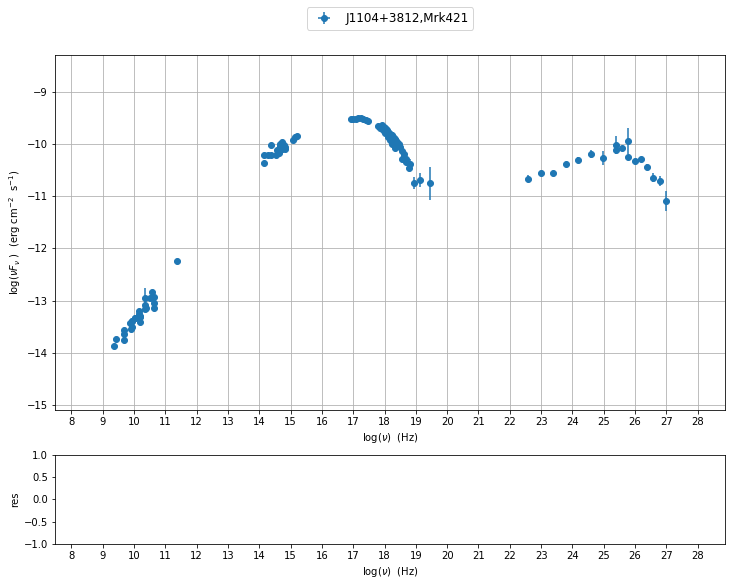

In [5]:
from jetset.plot_sedfit import Plot
myPlot=Plot(sed_data,interactive=True)

myPlot.add_data_plot(sed_data,autoscale=True)

grouping data
-----------------------------------
As you can see, due to the overlapping of different instruments and to different time snapshots, 
some points have multiple values. Although this is not a problem for the fit process, you might 
want to rebin your data. This can be obtained with the following command:

In [6]:
sed_data.group_data(bin_width=0.2)


***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2




handling errors and systematics
-----------------------------------
Another important issues when dealing with fitting of data, is the proper handling of errors.
Typically one might need to add systematics for different reasons:
 
 - data are not really simultaneous, and you want to add systematics to take this into account
 - data (typically IR up to UV), might have very small errors compared to those at higher energies.
   This might bias the minimizer to accomodate the parameters  in order to fit 'better' the low
   frequencies branch.
  
For these reasons the package offer the possibility to add systematics 
  
  

running PyLab in interactive mode
directory ./ already existing


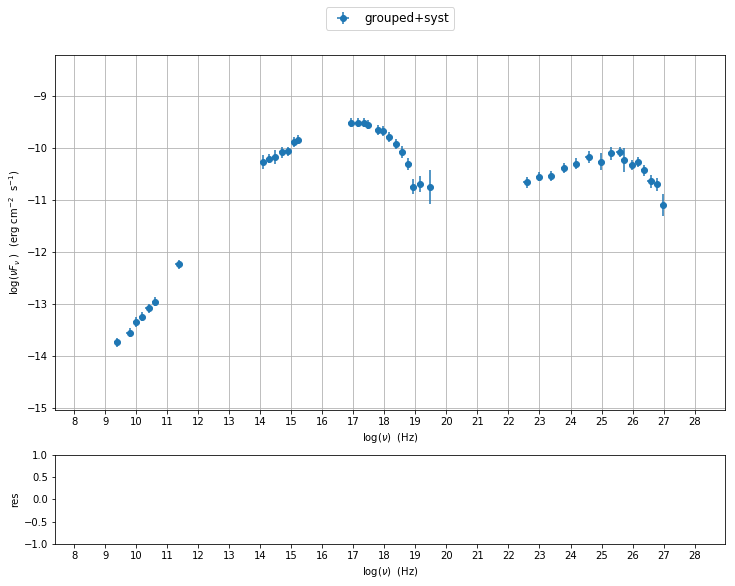

In [7]:
sed_data.add_systematics(0.2,[10.**6,10.**29])
myPlot=Plot(interactive=True)
myPlot.add_data_plot(sed_data,label='grouped+syst',autoscale=True)

SEDShape: Spectral indices
-------------------------

In [8]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices()


*** evaluating spectral indices for data ***
---> range for indexradio updated to [6.000000,10.000000]
directory ./ already existing
directory .//spectral-indices-best-fit/ already existing
removing existing dir
the directory .//spectral-indices-best-fit/ has been created
minim function calls=10, res=-0.016464, chisq=0.36949res check 0.04026525969092254 0.36841820872973546
---> 1000000.0 10000000000.0 100
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.402754e+00, err=1.250721e-01 

**************************************************************************************************
Fit report

Model: spectral-indices-best-fit
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 a

running PyLab in interactive mode
directory ./ already existing
label radio
label radio_mm
label mm_IR
label IR_Opt
label Opt_UV
label BBB
label UV_X
label X
label Fermi


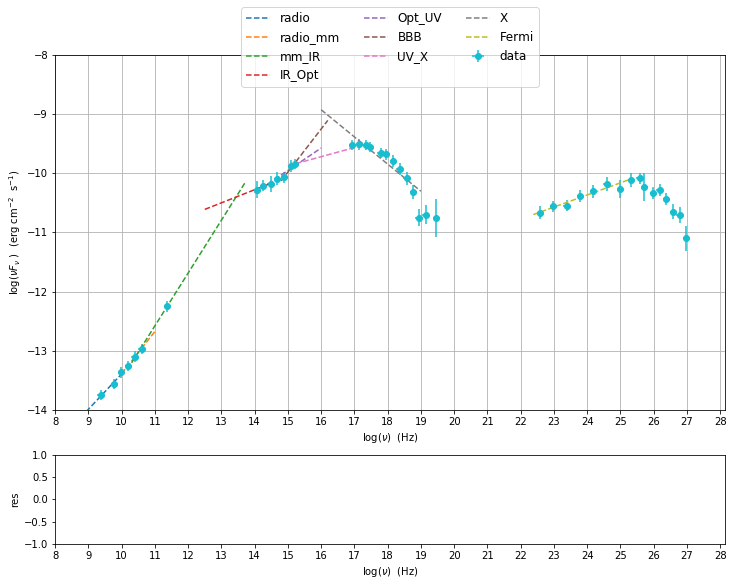

In [9]:
myPlot=Plot(sed_data,interactive=True)

for model in my_shape.index_models:
    myPlot.add_model_plot(model,label=model.name,line_style='--',autoscale=True)

myPlot.add_data_plot(sed_data,autoscale=True,label='data',color='red')
myPlot.rescale(y_min=-14,y_max=-8,x_min=8)

SEDShape: Log-Log Polynomila fit
-------------------------------

In [10]:
myPlot.save('SED_indices_rebinned.png')


my_shape.sync_fit(check_host_gal_template=True)


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run, log-cubic fit range: [9, 19]
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 b                | curvature                |                  | -1.000000e+00 | [-1.000000e+01,+0.000000e+00]  
 c                | third-degree             |                  | -1.000000e+00 | [-1.000000e+01,+1.000000e+01]  
 Ep               | peak freq                | Hz               | +1.400000e+01 | [+0.000000e+00,+3.000000e+01]  
 Sp               | peak flux                | erg cm^-2 s^-1   | -1.000000e+01 | [-3.000000e+01,+0.000000e+00]  
-----------------------------------------------------------------------------------------

In [11]:
my_shape.IC_fit()


*** Log-Polynomial fitting of the IC component ***
---> log-cubic fit range: [22, 28]
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 b                | curvature                |                  | -1.000000e+00 | [-1.000000e+01,+0.000000e+00]  
 c                | third-degree             |                  | -1.000000e+00 | [-1.000000e+01,+1.000000e+01]  
 Ep               | peak freq                | Hz               | +2.525747e+01 | [+0.000000e+00,+3.000000e+01]  
 Sp               | peak flux                | erg cm^-2 s^-1   | -1.000000e+01 | [-3.000000e+01,+0.000000e+00]  
--------------------------------------------------------------------------------------------------------------
directo

running PyLab in interactive mode
directory ./ already existing
<bound method SEDShape.sync_fit of <jetset.sed_shaper.SEDShape object at 0x15198daef0>> !!! Error has no SED instance or something wrong in get_model_points()
label host-gal
label sync+host, poly-fit
label IC, poly-fit


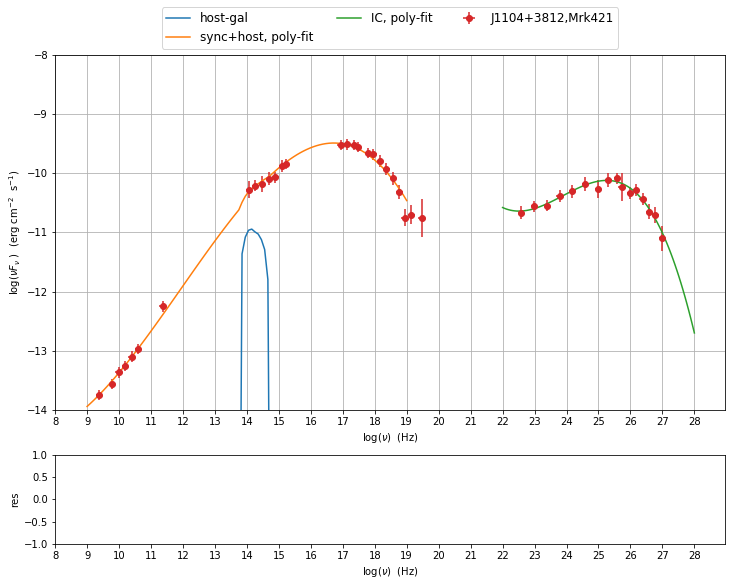

In [12]:
myPlot=Plot(sed_data,interactive=True)


myPlot.add_model_plot(my_shape.sync_fit,label='sync, poly-fit')

myPlot.add_model_plot(my_shape.host_gal,label='host-gal')

myPlot.add_model_plot(my_shape.sync_fit_model,label='sync+host, poly-fit')
myPlot.add_model_plot(my_shape.IC_fit_model,label='IC, poly-fit')
myPlot.add_data_plot(sed_data,autoscale=True)
myPlot.rescale(y_min=-14,y_max=-8,x_min=8)

In [13]:
my_shape.show_values()


*** SEDShape values ***
---> spectral inidces values
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.402754e+00, err=1.250721e-01 
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.290348e+00, err=3.549105e-02 
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.109667e+00, err=5.233777e-02 
---> name = IR_Opt           range=[12.500,14.500] log(Hz)  photon.val=-1.778730e+00, err=8.336742e-02 
---> name = Opt_UV           range=[14.000,16.000] log(Hz)  photon.val=-1.621180e+00, err=4.761716e-02 
---> name = BBB              range=[14.800,16.200] log(Hz)  photon.val=-1.273282e+00, err=1.558348e-01 
---> name = UV_X             range=[15.000,17.500] log(Hz)  photon.val=-1.845844e+00, err=1.974304e-02 
---> name = X                range=[16.000,19.000] log(Hz)  photon.val=-2.458173e+00, err=7.557517e-02 
---> name = Fermi            range=[22.380,25.380] log(Hz)  photon.val=-1.795555e+00, err=1.996363e-02 
---> S/IC 

Constraining SSC/EC model
-------------------------

In [14]:
from jetset.obs_constrain import ObsConstrain

sed_obspar=ObsConstrain(beaming=25,B_range=[0.01,0.1],distr_e='lppl',t_var_sec=3*86400,nu_cut_IR=9.0E12,SEDShape=my_shape)

directory ./ already existing


In [15]:
jet_model=sed_obspar.constrain_SSC_model()


***  constrains parameters from observable ***
directory .//obs_constrain_lppl/ already existing
removing existing dir
the directory .//obs_constrain_lppl/ has been created
directory ./ already existing
directory .//lppl_jet_prod/ already existing
removing existing dir
the directory .//lppl_jet_prod/ has been created
directory .//obs_constrain_lppl/ already existing
removing existing dir
the directory .//obs_constrain_lppl/ has been created
-----------------------------------------------------------------------------------------
model parameters for jet model:
electron distribution type = lppl  
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3     

directory ./ already existing
label Sum
label Sync
label SSC
res 0


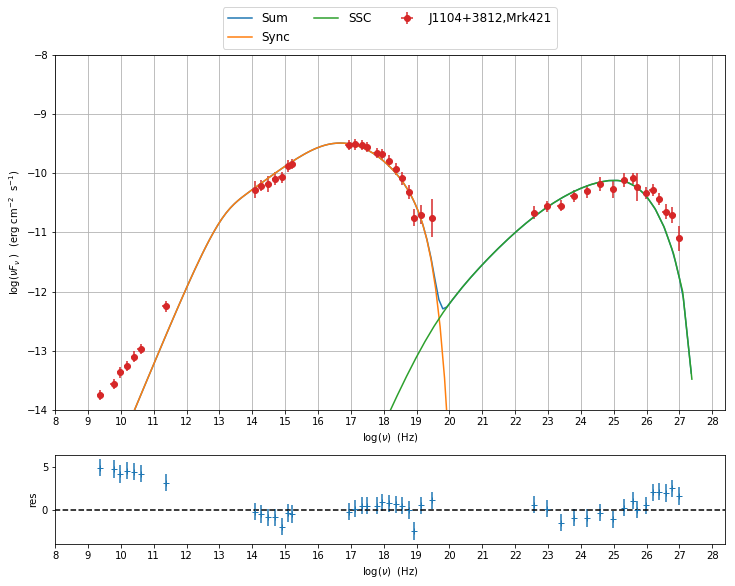

In [16]:
constr_Plot=Plot(sed_data,interactive=False)
jet_model.plot_model(plot_obj=constr_Plot)

constr_Plot.add_data_plot(sed_data,autoscale=True)
constr_Plot.rescale(y_min=-14,y_max=-8,x_min=8)
constr_Plot.add_residual_plot(jet_model,sed_data,autoscale=True)

SSC/EC fitting
--------------

In [17]:
from jetset.model_manager import FitModel
from jetset.minimizer import  fit_SED

fit_model=FitModel( jet=jet_model, name='SSC-best-fit',  template=my_shape.host_gal)

fit_model.set('z_cosm','frozen')

fit_model.set('beam_obj','frozen')

fit_model.set('nuFnu_p_host','frozen')

#SEDModel.set('L_host',fit_range=[-10.5,-9.5])

fit_model.show_pars()
    
best_fit=fit_SED(fit_model,sed_data,10.0**11 ,10**28.0,fitname='SSC-best-fit-lppl',minimizer='leastsqbound')

--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +8.532234e-01 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +1.001469e+03 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +9.758134e+05 | [+1.000000e+00,No           ]  
 s                | LE_spectral_slope        |                  | +2.182289e+00 | [-1.000000e+01,+1.000000e+01]  
 r                | spectral_curvature       |                  | +8.052977e-01 | [-1.000000e+01,+1.000000e+01]  
 gamma0_log_parab | turn-over-energy         | Lorentz-factor   | +2.374028e+04 | [+1.00000

running PyLab in interactive mode
directory ./ already existing
label SSC-best-fit
label Sum
label Sync
label SSC
label Sum
label host-galaxy
res 0


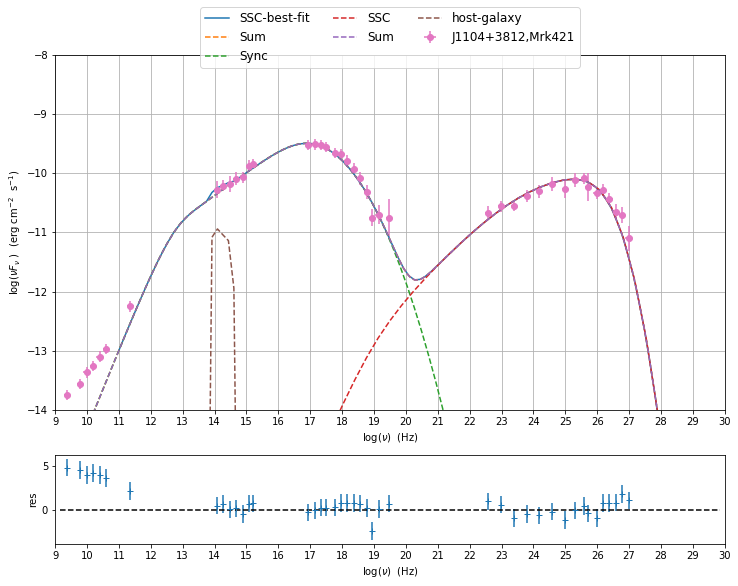

In [18]:
fit_Plot=Plot(sed_data,interactive=True)
fit_Plot.add_model_plot(fit_model,label='SSC-best-fit')
fit_Plot.autoscale()
fit_Plot.rescale(y_min=-14,y_max=-8,x_min=9.0,x_max=30)

for c in fit_model.components[0].spectral_components:
    fit_Plot.add_model_plot(c.SED,autoscale=False,line_style='--')

for c in fit_model.components:
    fit_Plot.add_model_plot(c.SED,autoscale=False,line_style='--')
    
fit_Plot.add_data_plot(sed_data,autoscale=False,color='b')


fit_Plot.add_residual_plot(jet_model,sed_data)


In [19]:
best_fit=fit_SED(fit_model,sed_data,10.0**11 ,10**28.0,fitname='SSC-best-fit-lppl',minimizer='minuit')

directory ./ already existing
directory .//SSC-best-fit-lppl/ already existing
removing existing dir
the directory .//SSC-best-fit-lppl/ has been created
directory .//SSC-best-fit-lppl/ already existing
removing existing dir
the directory .//SSC-best-fit-lppl/ has been created
filtering data in fit range = [1.000000e+11,1.000000e+28]
data length 37

*** start fit process ***
initial pars: 
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +7.347651e-01 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +8.891318e+02 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off 

running PyLab in interactive mode
directory ./ already existing
label SSC-best-fit
label Sum
label Sync
label SSC
label Sum
label host-galaxy
res 0


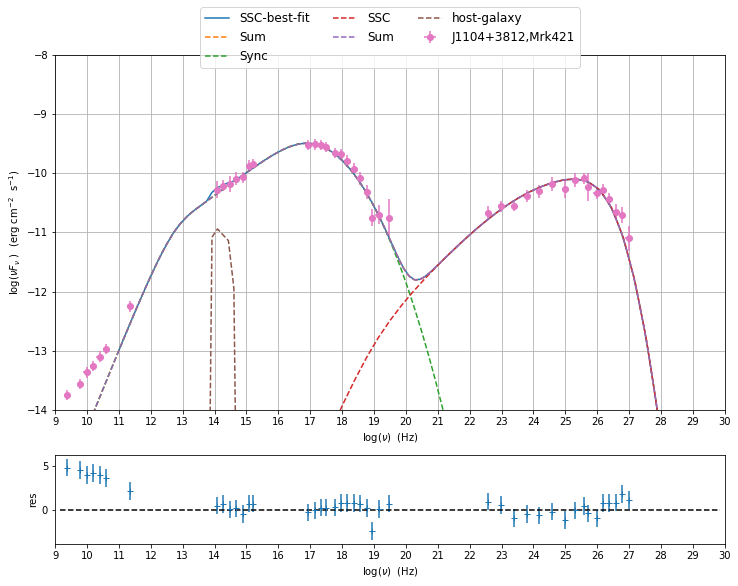

In [20]:
fit_Plot=Plot(sed_data,interactive=True)
fit_Plot.add_model_plot(fit_model,label='SSC-best-fit')
fit_Plot.autoscale()
fit_Plot.rescale(y_min=-14,y_max=-8,x_min=9.0,x_max=30)

for c in fit_model.components[0].spectral_components:
    fit_Plot.add_model_plot(c.SED,autoscale=False,line_style='--')

for c in fit_model.components:
    fit_Plot.add_model_plot(c.SED,autoscale=False,line_style='--')
    
fit_Plot.add_data_plot(sed_data,autoscale=False,color='b')


fit_Plot.add_residual_plot(jet_model,sed_data)

